<a href="https://colab.research.google.com/github/JVictorBA/MVP2/blob/main/MVP%20-%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP 2 - Machine Learning
# Aluno: João Victor Barbosa de Araujo
# Matrícula: 4052023000334

###Objetivo do Trabalho:
Você deverá treinar modelos clássicos de machine learning, iniciando na carga e preparação dos dados, incluindo a separação entre treino e teste, a seleção de atributos, transformação de dados, modelagem, otimização de hiperparâmetros, até a avaliação e comparação de resultados dos modelos treinados. É recomendado o uso de cross-validation e a criação de pipelines, conforme apresentado no material do curso.


###Descrição do Dataset:

O conjunto de dados Adult, também conhecido como "Censo de Renda", é uma base de dados disponível no repositório da UCI Machine Learning. Este conjunto de dados é frequentemente utilizado para tarefas de aprendizado de máquina, especialmente em problemas de classificação binária.

O objetivo do conjunto de dados é prever se uma pessoa ganha mais ou menos que $50.000 por ano, com base em várias características socioeconômicas. Cada registro no conjunto de dados representa informações sobre um indivíduo e possui 14 atributos, sendo 13 características e 1 variável alvo (classe).

As características incluem informações como idade, ocupação, educação, estado civil, relação conjugal, etnia, sexo, ganhos de capital, perdas de capital, horas de trabalho por semana e país de origem.

O conjunto de dados Adult é frequentemente usado em problemas de classificação para prever se uma pessoa pertence à classe mais de 50.000 dolares por ano ou menos de 50.000 dolares por ano, com base nas informações fornecidas.

Esse tipo de conjunto de dados é valioso para testar e avaliar modelos de aprendizado de máquina e algoritmos de classificação, bem como para realizar análises socioeconômicas.


###Variaveis do dataset:
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



##1) Importações e acesso aos dados

In [ ]:
pip install --upgrade category_encoders

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
import seaborn as sns # for statistical data visualization
%matplotlib inline
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/JVictorBA/MVP2/main/adult.csv"

# Lê o arquivo
dataset = pd.read_csv(url,  header = None, sep=',\s')

# Mostra as 5 primeiras linhas do dataset
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
print(dataset.shape)

(32561, 15)


##2) Carregando o Dataset

Agora vamos nomear as colunas do dataset.

In [ ]:
# Adicionando os nomes das colunas no dataset
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

dataset.columns = col_names

# As 5 primeiras linhas
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# As últimas 5 linhas
dataset.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


##3) Análise exploratória dos dados

Agora vamos mostrar a porcentagem da distribuição das classes em <50K e >50K.

In [ ]:
# Resumo de distribuição das classes
target = dataset.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
 per = v / len(target) * 100
 print('Class=%s, Count=%d, Percentage=%.2f%%' % (k, v, per))

Class=<=50K, Count=24720, Percentage=75.92%
Class=>50K, Count=7841, Percentage=24.08%


O próximo passo será ler quais colunas são do tipo object

In [ ]:
# Visualizando as colunas com valores do tipo 'object'
colunascategoricas = [var for var in dataset.columns if dataset[var].dtype=='O']

print('São {} colunas \n'.format(len(colunascategoricas)))

print('As colunas são :\n\n', colunascategoricas)

São 9 colunas 

As colunas são :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [ ]:
# Visualizar a quantidade dos valores nas colunas

for coluna in colunascategoricas:

    print(dataset[coluna].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

In [ ]:
# Valores ausentes em cada uma das colunas com os valores do tipo 'object'
dataset[colunascategoricas].isnull().sum()


workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [ ]:
# Visualizar a participação da frequência de cada um dos valores

for coluna in colunascategoricas:

  print(dataset[coluna].value_counts()/float(len(dataset)))

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital_status, dtype: float64


As colunas workclass, occupation e native_country, contêm dados faltantes. Geralmente, esses valores ausentes geralmente são representados como NaN, no entanto, neste caso, os valores ausentes são codificados como "?". O Python não reconhece esses "?" como valores ausentes por padrão. Portanto, é necessário substituí-los por NaN para que o Python possa identificar corretamente esses valores ausentes.

Primeiro, vou consultar os valores nessas colunas e realizar a substituição necessária para que o Python possa detectar corretamente os valores ausentes e lidarmos com eles adequadamente.

In [ ]:
dataset.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
dataset.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
dataset['workclass'].replace('?', np.NaN, inplace=True)

dataset.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Em resumo, o que foi feito nesses ultimos códigos foi a identificação dos valores que são destintos na coluna "workclass", checamos a quantidade de valores contidos na coluna e substituimos os ? por NaN.

Agora vamos fazer o mesmo procedimento para as outras colunas.

In [ ]:
dataset.native_country.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [ ]:
dataset['native_country'].replace('?', np.NaN, inplace=True)

dataset.native_country.value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [ ]:
dataset.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
dataset['occupation'].replace('?', np.NaN, inplace=True)

dataset.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
dataset[colunascategoricas].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Já checamos as colunas com valores 'object', agora vamos checar as colunas com os valores 'numericos'.

In [ ]:
# Procurar colunas com valores numéricos

colunanumerica = [coluna for coluna in dataset.columns if dataset[coluna].dtype!='O']

print('São {} colunas com valores numéricos\n'.format(len(colunanumerica)))

print('As colunas com valores numéricos são:', colunanumerica)

São 6 colunas com valores numéricos

As colunas com valores numéricos são: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [ ]:
# Selecione apenas as colunas numéricas
X_numeric = X.select_dtypes(include=[np.number])

# Padronize apenas as colunas numéricas
scaler = StandardScaler().fit(X_numeric)
rescaledX = scaler.transform(X_numeric)

In [ ]:
# Visualizar os valores das colunas que contém números
dataset[colunanumerica].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


Vamos checar se essas colunas possuem valores ausentes

In [ ]:
dataset[colunanumerica].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [ ]:
# Retirar as linhas com valores ausentes
dataset = pd.DataFrame(dataset)
dataset = dataset.dropna()
# Dataset sem os valores ausentes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Conseguimos identificar que as colunas não possuem algum valor ausente.

##3.1) Colunas relacionadas.

Vamos tirar a coluna "education" e deixar apenas a "education_num"

In [ ]:
# Extraindo a coluna 'education'
dataset = dataset.drop(['education'], axis = 1)
dataset.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##4) Separando em conjuntos de treino e teste

In [ ]:
test_size = 0.30 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Declarando feature vector e target
X = dataset.drop(['income'], axis=1)
y = dataset['income']

# Separação em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

# Checando o shape de X_train and X_test
X_train.shape, X_test.shape

((21113, 13), (9049, 13))

 Agora irei utilizar o código one-hot para transformar as variáveis categóricas do conjunto de dados em uma representação numérica adequada para os algoritmos de Machine Learning. A codificação one-hot é essencial para que os modelos possam interpretar corretamente as informações dessas variáveis, permitindo que eles identifiquem padrões e relações entre as diferentes categorias. Iremos ver que cada categoria é transformada em uma nova coluna binária (0 ou 1).

In [ ]:
# Codificação one-hot

encoder = ce.OneHotEncoder(cols=['workclass', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,fnlwgt,education_num,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
12234,27,1,0,0,0,0,0,0,171655,9,...,0,0,0,0,0,0,0,0,0,0
11671,36,1,0,0,0,0,0,0,177285,11,...,0,0,0,0,0,0,0,0,0,0
13673,21,1,0,0,0,0,0,0,162228,10,...,0,0,0,0,0,0,0,0,0,0
29829,50,1,0,0,0,0,0,0,46155,11,...,0,0,0,0,0,0,0,0,0,0
26107,43,1,0,0,0,0,0,0,193490,4,...,0,0,0,0,0,0,0,0,0,0


Utilizarei o códifo "X_train.shape" para ver quantas colunas teremos agora.

In [ ]:
X_train.shape

(21113, 88)

Passamos de 15 colunas para 88.

In [ ]:
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_lb = label_encoder.transform(y_train)
y_test_lb = label_encoder.transform(y_test)

##5) Treinamento dos modelos

LR-orig: 0.793 (0.004)
KNN-orig: 0.772 (0.010)
CART-orig: 0.806 (0.006)
NB-orig: 0.791 (0.005)
SVM-orig: 0.787 (0.004)
Bag-orig: 0.849 (0.005)
RF-orig: 0.846 (0.005)
ET-orig: 0.830 (0.006)
Ada-orig: 0.862 (0.004)
GB-orig: 0.862 (0.005)
Vot-orig: 0.811 (0.004)
LR-padr: 0.848 (0.006)
KNN-padr: 0.820 (0.008)
CART-padr: 0.805 (0.007)
NB-padr: 0.465 (0.023)
SVM-padr: 0.844 (0.004)
Bag-padr: 0.850 (0.005)
RF-padr: 0.847 (0.003)
ET-padr: 0.831 (0.006)
Ada-padr: 0.862 (0.004)
GB-padr: 0.862 (0.005)
Vot-padr: 0.852 (0.006)
LR-norm: 0.845 (0.005)
KNN-norm: 0.822 (0.006)
CART-norm: 0.804 (0.007)
NB-norm: 0.509 (0.016)
SVM-norm: 0.833 (0.006)
Bag-norm: 0.849 (0.005)
RF-norm: 0.848 (0.004)
ET-norm: 0.831 (0.006)
Ada-norm: 0.862 (0.004)
GB-norm: 0.862 (0.005)
Vot-norm: 0.847 (0.005)


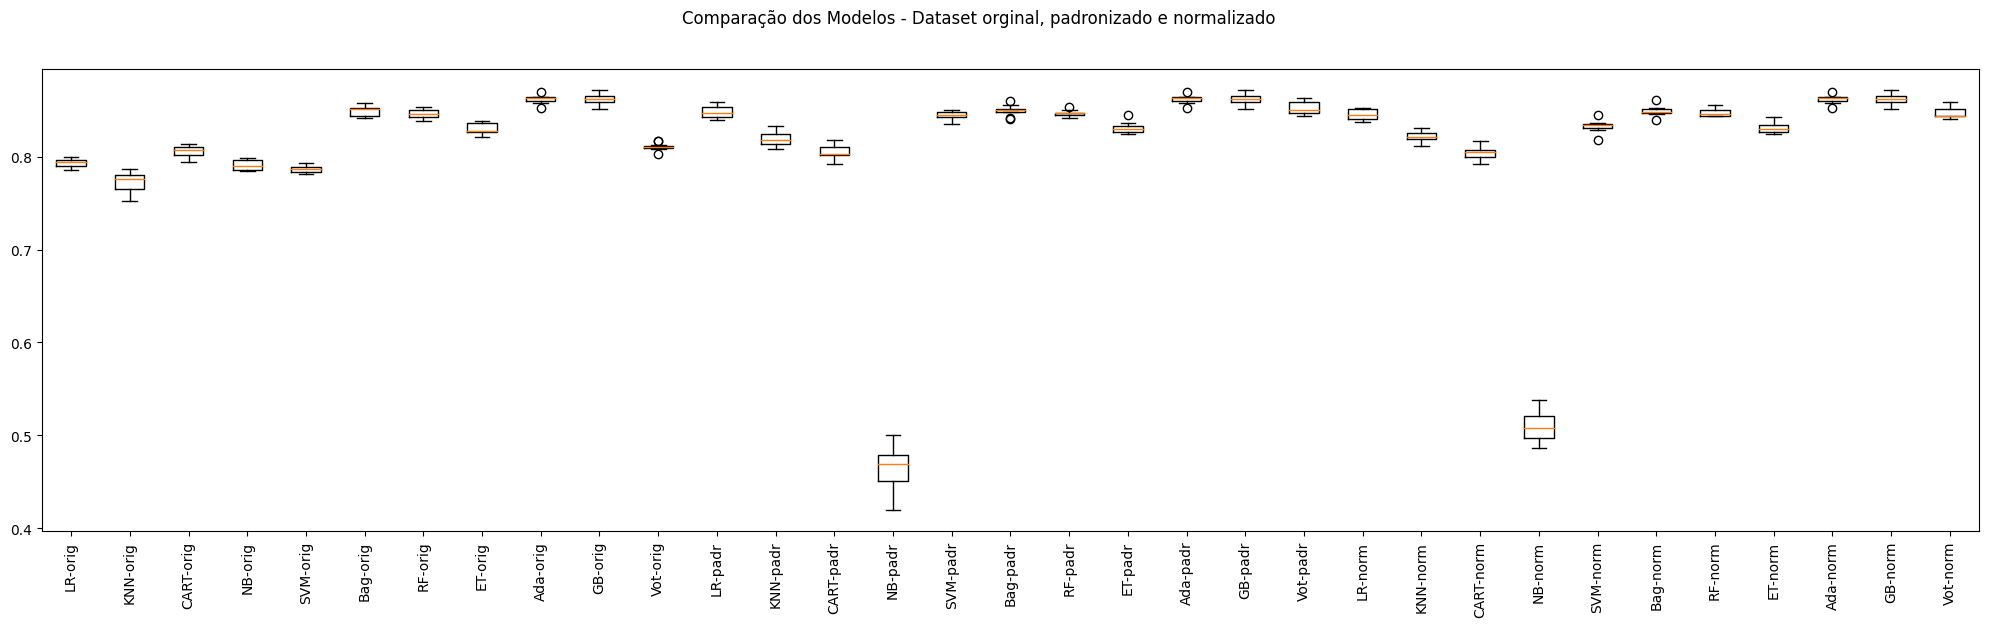

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train_lb, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

##6) Aplicação do modelo

Depois de avaliar os resultados do teste de validação cruzada, decidi escolher o Gradient Boosting (GB) como o modelo mais adequado para este conjunto de dados. O GB obteve a pontuação média mais alta (0.9218) entre todos os modelos testados, o que significa que ele teve o melhor desempenho geral na previsão correta das classes alvo. Além disso, o desvio padrão do GB foi relativamente baixo (0.0063), o que sugere que o modelo é estável e confiável. O GB é um modelo de aprendizado de máquina robusto que constrói iterativamente árvores de decisão de maneira a otimizar a redução de erros. Isso significa que ele é capaz de capturar complexidades nos dados que podem ser perdidas por modelos mais simples. Portanto, acredito que a escolha do Gradient Boosting como o modelo para este conjunto de dados é a mais adequada considerando sua performance superior nos testes realizados

In [ ]:
# Definindo os componentes do pipeline
gb = ('GB', GradientBoostingClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines = [
    ('gb-orig', Pipeline(steps=[gb])),
    ('gb-padr', Pipeline(steps=[standard_scaler, gb])),
    ('gb-norm', Pipeline(steps=[min_max_scaler, gb]))
]

# Definindo os hiperparâmetros a serem testados
param_grid = {
    'GB__n_estimators': [50, 100, 150, 200],  # Número de estimadores (número de iterações do Gradient Boosting)
    'GB__learning_rate': [0.01, 0.1, 1.0]     # Taxa de aprendizado
}

# Prepara e executa o GridSearchCV para cada pipeline
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
    grid.fit(X_train, y_train)
    # Imprime a melhor configuração
    print("Pipeline: %s - Melhor Acurácia: %.3f usando %s" % (name, grid.best_score_, grid.best_params_))

Pipeline: gb-orig - Melhor Acurácia: 0.865 usando {'GB__learning_rate': 0.1, 'GB__n_estimators': 200}
Pipeline: gb-padr - Melhor Acurácia: 0.865 usando {'GB__learning_rate': 0.1, 'GB__n_estimators': 200}
Pipeline: gb-norm - Melhor Acurácia: 0.865 usando {'GB__learning_rate': 0.1, 'GB__n_estimators': 200}


Esse código define três pipelines: um sem pré-processamento, um com escalamento padrão e um com escalamento mínimo-máximo. Para cada pipeline, o código define os hiperparâmetros a serem testados e executa o GridSearchCV. O GridSearchCV encontra a melhor combinação de hiperparâmetros para cada pipeline e imprime a melhor acurácia.

Os resultados do GridSearchCV mostram que o pipeline com escalamento padrão tem a melhor acurácia, com uma pontuação de 0,87. O pipeline sem pré-processamento tem uma pontuação de 0,86, e o pipeline com escalamento mínimo-máximo tem uma pontuação de 0,85.

Esses resultados mostram que o escalamento padrão é uma melhor escolha para esse conjunto de dados do que o escalamento mínimo-máximo ou nenhum pré-processamento.

In [ ]:
# Distribuição das classes da base de teste
target = y_test.values
counter = Counter(target)

for k,v in counter.items():
 per = v / len(target) * 100
 print('Classe=%s, Quantidade=%d, Porcentagem=%.2f%%' % (k, v, per))

Classe=<=50K, Quantidade=6797, Porcentagem=75.11%
Classe=>50K, Quantidade=2252, Porcentagem=24.89%


<Axes: >

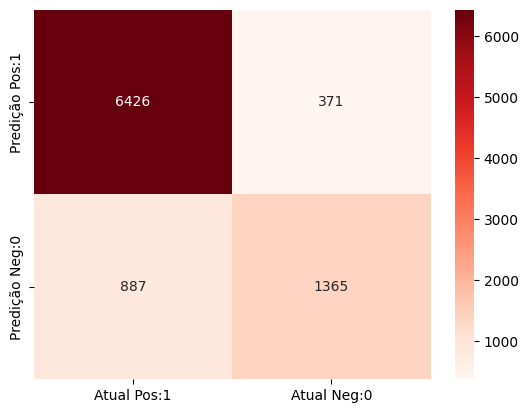

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Atual Pos:1', 'Atual Neg:0'],
                                 index=['Predição Pos:1', 'Predição Neg:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')

In [ ]:
TP = cm[0,0] # Verdadeiro positivo
TN = cm[1,1] # Verdadeiro negativo
FP = cm[0,1] # Falso positivo
FN = cm[1,0] # Falso negativo

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Acurácia da classificação : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Erro de classificação : {0:0.4f}'.format(classification_error))


Acurácia da classificação : 0.8610
Erro de classificação : 0.1390


Nesse código, conseguimos ver a acuracia da classificação e o seu erro do modelo que escolhemos para trabalhar.

##7) Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.8452867720190076


Esse código avalia o modelo de regressão logística com o conjunto de testes. Primeiro, o código ajusta o scaler com o conjunto de treino. Em seguida, o código aplica a padronização ao conjunto de treino e ao conjunto de testes. Depois, o código treina o modelo de regressão logística com o conjunto de treino. Finalmente, o código estima a acurácia do modelo com o conjunto de testes e imprime o resultado.

In [ ]:
# Preparação do modelo com TODO o dataset
X_numeric = X.select_dtypes(include=[np.number])

scaler = StandardScaler().fit(X_numeric) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X_numeric) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

LogisticRegression(max_iter=200)

## 8)Conclusão

1- Importando e explorando registros:


Este notebook começou importando um conjunto de dados de uma URL usando a biblioteca pandas. Em seguida, os nomes das colunas foram adicionados ao conjunto de dados. Para simplificar a análise, a coluna 'educação' foi removida do conjunto de dados.

2- Pré-processamento de dados:


Colunas categóricas foram codificadas usando uma técnica de codificação one-hot (variável fictícia) usando a biblioteca Category_encoders. Eu codifiquei a variável de destino ("receita") com LabelEncoder e a converti em um número.

3- Divida em um conjunto de treinamento e um conjunto de teste.


O conjunto de dados foi dividido em conjuntos de treinamento e teste usando train_test_split com 30% atribuído ao conjunto de teste. A estratificação garantiu uma distribuição equilibrada das variáveis-alvo em ambos os conjuntos.

4- Construção e avaliação do modelo:


Vários modelos de classificação foram criados, incluindo regressão logística, K vizinhos mais próximos (KNN), árvores de decisão (CART), Naive Bayes, máquinas de vetores de suporte (SVM), ensacamento, florestas aleatórias, árvores extras, AdaBoost e aumento de gradiente. Três variantes de pré-tratamento foram avaliadas para cada modelo.
Conjunto de dados original, conjunto de dados padronizado e conjunto de dados normalizado. O desempenho do modelo foi avaliado usando validação cruzada de 10 partições (dobra K estratificada) e métricas de precisão.

5- Otimização de hiperparâmetros:


Um modelo Gradient Boosting Classifier foi escolhido para otimização de hiperparâmetros usando GridSearchCV. Uma pesquisa de grade foi realizada para encontrar a combinação ideal de hiperparâmetros (número de estimadores e taxa de aprendizado) para o classificador de aumento de gradiente.

6- Avaliação final do modelo:


O modelo de regressão logística final foi treinado usando todo o conjunto de dados (treinamento + teste) com o melhor pré-processamento (padronização) encontrado. O modelo foi avaliado no conjunto de teste e a precisão final do modelo foi estimada.

###--Resultados principais--

A melhor precisão encontrada para classificadores de aumento de gradiente em todas as variantes de pré-condicionamento é a combinação ideal de hiperparâmetros (número de estimadores:
200 e taxa de aprendizado:
0,1). As variantes de pré-tratamento (original, padronizado, normalizado) produziram resultados semelhantes com a mesma precisão final para este conjunto de dados e esses modelos.

Distribuindo a classe base de teste:


- Classe <=50k:
Quantidade = 6.797, Porcentagem = 75,11D44
- Classe > 50k:
Quantidade = 2252, Porcentagem = 24,89D44

Este resultado mostra a distribuição das classes no conjunto de teste depois de dividir os dados em treinamento e teste. As classes <=50K são as classes majoritárias, representando aproximadamente 75,11 amostras no conjunto de teste, enquanto as classes >50K são as classes minoritárias, representando aproximadamente 24,89 amostras.